In [6]:
# importing libraries

# pip install tensorflow
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

  Using cached tensorflow-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached tensorboard-2.9.0-py3-none-any.whl (5.8 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached protobuf-3.19.4-cp39-cp39-win_amd64.whl (895 kB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached grpcio-1.46.3-cp39-cp39-win_amd64.whl (3.5 MB)
  Us

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account al

In [26]:
# Setting parms for images


IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [14]:
# Importing dataset


dataset = tf.keras.preprocessing.image_dataset_from_directory
    (
    r'C:\Users\immor\Desktop\Data Analyst Portfolio Project\Datasets\PlantVillage',
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE 
    )


Found 2152 files belonging to 3 classes.


In [16]:
# Creating class names


class_names = dataset.class_names

class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

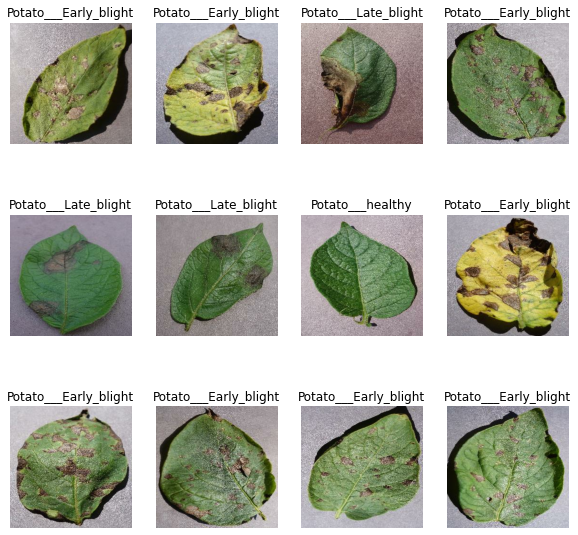

In [25]:
# printing Image


plt.figure(figsize=(10,10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [27]:
len(dataset)

68

In [ ]:
# Setting up model


80% ==> training
20% ==> 10% validation, 10% test

In [29]:
# Making model p1


train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [30]:
# Making model p2


train_ds = dataset.take(54)
len(train_ds)

54

In [35]:
# Making model p3


# Finding the 20% to use for val and test dataset
ftest_ds = dataset.skip(54)
len(ftest_ds)

14

In [32]:
# Making model p4


# finding validation dataset size
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [37]:
# Making model p5


# Making validation dataset 
val_ds = ftest_ds.take(6)
len(val_ds)

6

In [38]:
# Making model p6


# Making test dataset 

test_ds = ftest_ds.skip(6)
len(test_ds)

8

In [54]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [55]:
# testing Funciton


train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [56]:
# Checking sizes of each ds


len(train_ds)

54

In [58]:
len(val_ds)

6

In [59]:
len(test_ds)

8

In [61]:
# Improving/optimizing runtime of model


train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [62]:
# Resizng image and rescaling colors (basically nomrlaizing images)


resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [64]:
# Creaing data augmenttation


data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [67]:
# Creating model


input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3


model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

In [69]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [70]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 54s 935ms/step - loss: 0.9196 - accuracy: 0.4711 - val_loss: 0.8950 - val_accuracy: 0.4844
Epoch 2/50
54/54 [==============================] - 53s 992ms/step - loss: 0.7125 - accuracy: 0.6615 - val_loss: 0.4576 - val_accuracy: 0.8229
Epoch 3/50
54/54 [==============================] - 54s 1s/step - loss: 0.3826 - accuracy: 0.8438 - val_loss: 0.2566 - val_accuracy: 0.9115
Epoch 4/50
54/54 [==============================] - 51s 939ms/step - loss: 0.3578 - accuracy: 0.8524 - val_loss: 0.2494 - val_accuracy: 0.9062
Epoch 5/50
54/54 [==============================] - 52s 954ms/step - loss: 0.2683 - accuracy: 0.8964 - val_loss: 0.2094 - val_accuracy: 0.9219
Epoch 6/50
54/54 [==============================] - 49s 909ms/step - loss: 0.2418 - accuracy: 0.9010 - val_loss: 0.2418 - val_accuracy: 0.9062
Epoch 7/50
54/54 [==============================] - 47s 876ms/step - loss: 0.2190 - accuracy: 0.9138 - val_loss: 0.2057 - val_accuracy: 0.9167
Ep

In [71]:
scores = model.evaluate(test_ds)

scores

8/8 [==============================] - 3s 230ms/step - loss: 0.0376 - accuracy: 0.9961


[0.037582945078611374, 0.99609375]

In [72]:
# making function to predict images


def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 22ms/step


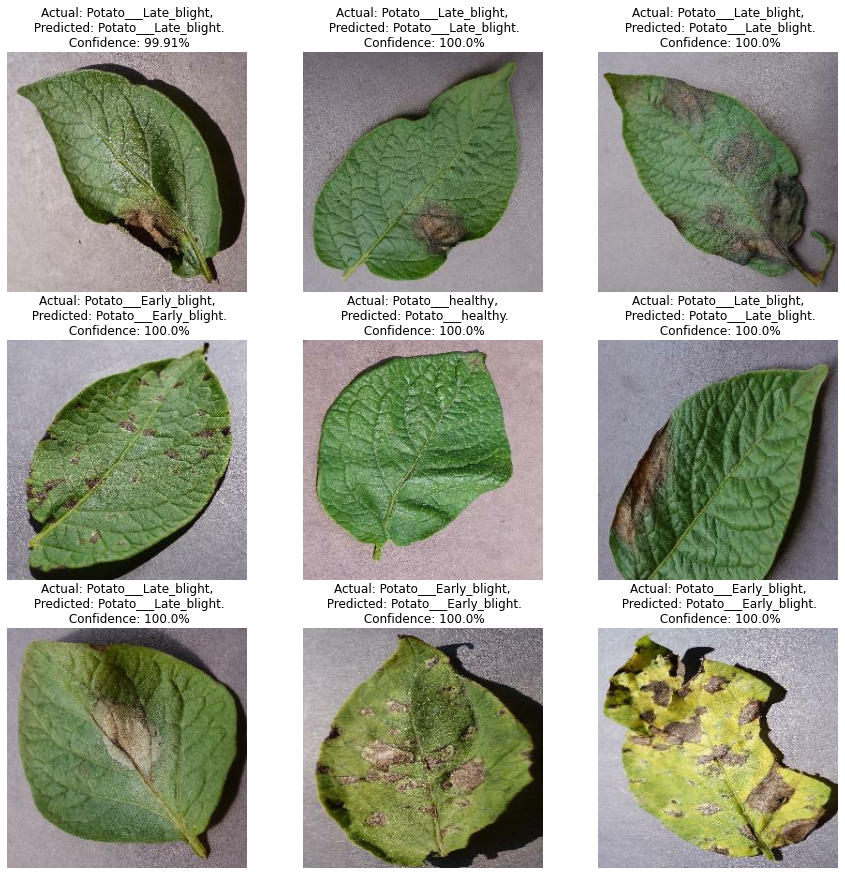

In [74]:
# Testing function 

import numpy as np

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")